# RoofAIDataset review

for CamVid and CamVid-like datasets

In [1]:
import os
from abcli import file
from abcli.modules import objects
from abcli import fullname
from abcli.plugins import cache
from roofAI.semseg.utils import visualize
from roofAI.ingest.dataset import RoofAIDataset, Kind
from IPython.display import Image
from abcli import string
from abcli.plugins import seed
import numpy as np

import abcli.logging
import logging

logger = logging.getLogger()

logger.info(f"{fullname()}, built on {string.pretty_date()}")

Found credentials in shared credentials file: ~/.aws/credentials
abcli-7.2379.1-2023-06-aws-batch-a, built on 15 October 2023, 21:07:43


In [2]:
dataset_object_name = cache.read("roofAI_ingest_CamVid_v1")
subset = "train"
index = 3

In [3]:
dataset = RoofAIDataset(objects.object_path(dataset_object_name))

record_id = dataset.subsets[subset][index]
logger.info(f"record_id: {record_id}")

image = dataset.get_matrix(subset, record_id, Kind.IMAGE, log=True)

mask = dataset.get_matrix(subset, record_id, Kind.MASK, log=True)

RoofAIDataset[roofAI_ingest_CamVid_2023-10-15-15-56-03-26635]: 3 subset(s): 233 X test + 367 X train + 101 X val
record_id: 0006R0_f02550
RoofAIDataset[roofAI_ingest_CamVid_2023-10-15-15-56-03-26635].get_filename(train,0006R0_f02550,Kind.IMAGE): /Users/kamangir/storage/abcli/roofAI_ingest_CamVid_2023-10-15-15-56-03-26635/SegNet-Tutorial/CamVid/train/0006R0_f02550.png
RoofAIDataset.get_matrix(train,0006R0_f02550,Kind.IMAGE): 360x480x3:uint8
RoofAIDataset[roofAI_ingest_CamVid_2023-10-15-15-56-03-26635].get_filename(train,0006R0_f02550,Kind.MASK): /Users/kamangir/storage/abcli/roofAI_ingest_CamVid_2023-10-15-15-56-03-26635/SegNet-Tutorial/CamVid/trainannot/0006R0_f02550.png
10 unique value(s): [ 0  1  2  3  4  5  6  8  9 11]
RoofAIDataset.get_matrix(train,0006R0_f02550,Kind.MASK): 360x480:uint8


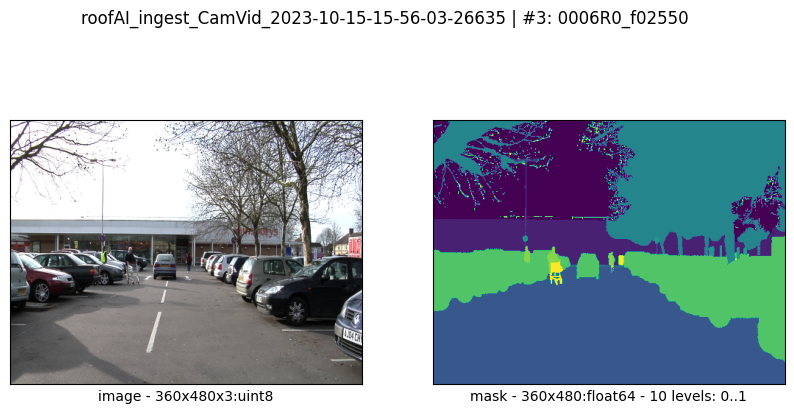

In [4]:
visualize(
    {
        "image": image,
        "mask": mask/np.max(mask),
    },
    in_notebook = True,
    description = [dataset_object_name, f"#{index}: {record_id}"])

In [5]:
seed.log(dataset_object_name)

abcli select roofAI_ingest_CamVid_2023-10-15-15-56-03-26635; open .


In [6]:
# END